In [2]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


In [3]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [4]:
# Define the directory path where the files are located
directory_path = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolved_1D8years/'
directory_path2 = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal_1D8years_nomaxtimestep_burning/'
directory_path3 = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/'


In [3]:
file_pattern = os.path.join(directory_path2, 'profile*.data')
data_files = glob.glob(file_pattern)
print(data_files)

['/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile1.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile2.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile3.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile4.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile5.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile6.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile7.data', '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/profile

In [4]:
# Create a slider for file selection
file_slider = widgets.IntSlider(min=0, max=len(data_files)-1, step=1, description='File Index')
# Create an Output widget for the plot
plot_output = widgets.Output()

In [13]:
# Create a function to update the plot based on the file index
yvals=["xq","he4","fe56","luminosity","logS","T","Rho"]
xvals=["xq","logR"]
def update_plot(file_index):
    file = data_files[file_index]
    data = MesaData(file)

    with plot_output:
        clear_output(wait=True)

        figs, axs=plt.subplots(len(yvals),len(xvals),figsize=(10,14))
        for y in range(len(yvals)):
            for x in range(len(xvals)):
                yvalue=yvals[y]
                xvalue=xvals[x]
                
                axs[y][x].plot(getattr(data,xvalue,None),getattr(data,yvalue,None))
                axs[y][x].set_ylabel(yvals[y])
                axs[y][x].set_xlabel(xvals[x])
        '''
        axs[0].plot(10**data.logR[1:],np.log10(data.xq[1:]))
        axs[0].set_ylabel('Mass')
        axs[0].set_xlabel('Radius')

        axs[1].plot(data.zone, np.log10(data.fe56))
        axs[1].set_ylabel('log10(ni56)')
        #axs[1].set_title('Composition')
        axs[2].plot(data.xq, data.luminosity)
        axs[2].set_ylabel('luminosity')
        axs[2].set_xlabel('luminosity')
        axs[3].plot(data.zone, np.log10(data.T))
        axs[3].set_ylabel('Luminosity')
        plt.xlabel('Radius')
        '''
        #plt.title(f'Mass and composition vs. Radius for File: {os.path.basename(file)}')
        plt.show()

In [15]:
file_slider_output = widgets.interactive_output(update_plot, {'file_index': file_slider})


In [14]:
display(widgets.HBox([plot_output, file_slider]))


# History


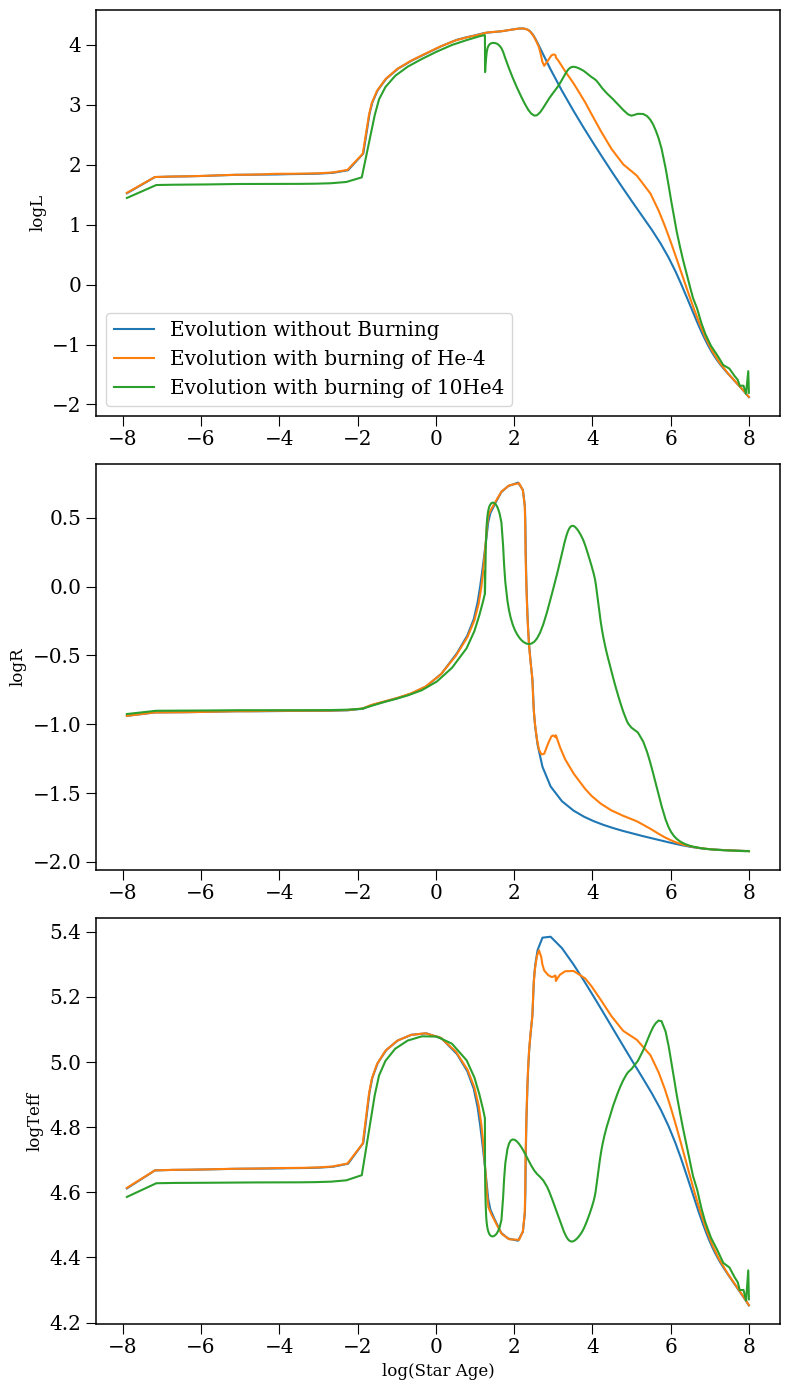

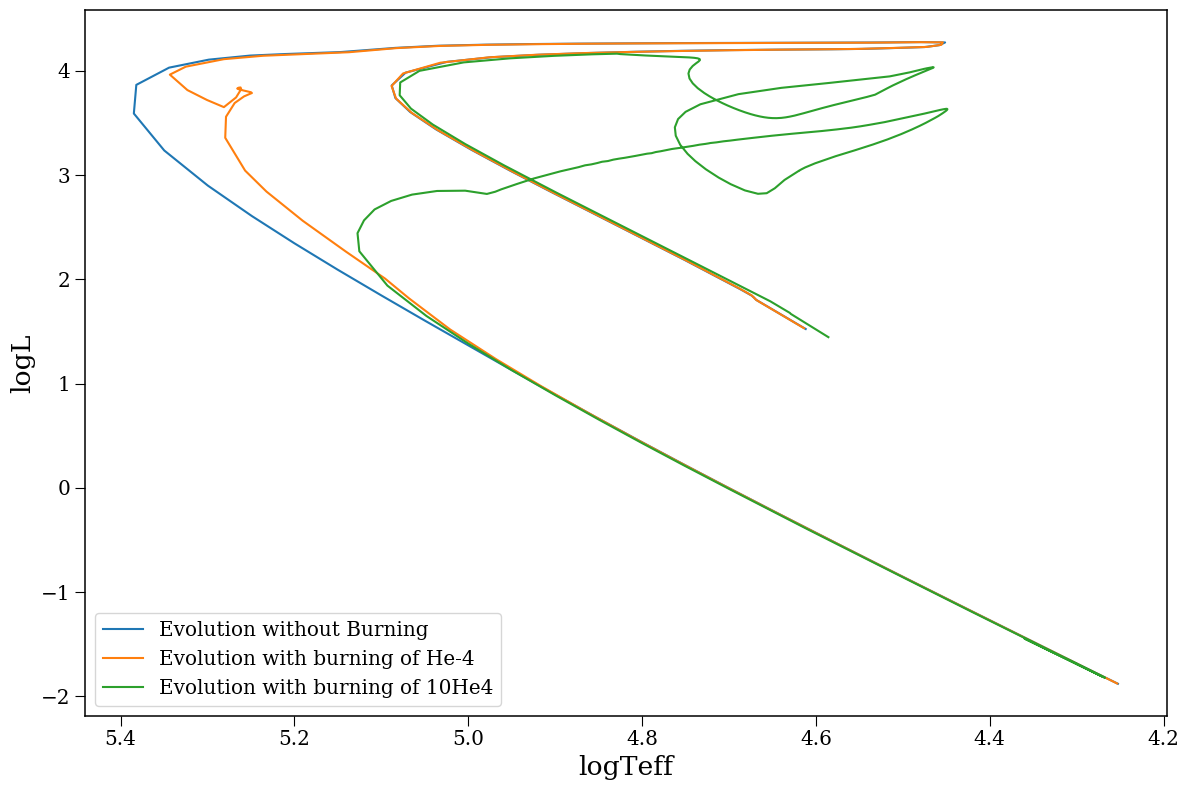

In [9]:
h = MesaData(os.path.join(directory_path, 'history.data'))
h2 = MesaData(os.path.join(directory_path2, 'history.data'))
h3 = MesaData(os.path.join(directory_path3, 'history.data'))

figs, axs=plt.subplots(3,1,figsize=(8,14))
axs[0].plot(np.log10(h.star_age), h.log_L)
axs[0].plot(np.log10(h2.star_age), h2.log_L)
axs[0].plot(np.log10(h3.star_age), h3.log_L)
axs[0].set_ylabel("logL",fontsize=12)
axs[0].legend(('Evolution without Burning','Evolution with burning of He-4','Evolution with burning of 10He4'))
axs[1].plot(np.log10(h.star_age), h.log_R)
axs[1].plot(np.log10(h2.star_age), h2.log_R)
axs[1].plot(np.log10(h3.star_age), h3.log_R)
axs[1].set_ylabel("logR",fontsize=12)
axs[2].plot(np.log10(h.star_age), h.log_Teff)
axs[2].plot(np.log10(h2.star_age), h2.log_Teff)
axs[2].plot(np.log10(h3.star_age), h3.log_Teff)
axs[2].set_ylabel("logTeff",fontsize=12)

# set axis labels
plt.xlabel('log(Star Age)',fontsize=12)
plt.tight_layout()

figs.savefig("../Long_Evolve/Plots_burning/comparison_all.pdf")
fig=plt.figure()
plt.plot(h.log_Teff, h.log_L)
plt.plot(h2.log_Teff, h2.log_L)
plt.plot(h3.log_Teff, h3.log_L)

plt.xlabel('logTeff')
plt.ylabel('logL')

plt.legend(('Evolution without Burning','Evolution with burning of He-4',
            'Evolution with burning of 10He4'),
           loc='best')
plt.gca().invert_xaxis()
#plt.scatter(4.322,-4.408)
#plt.scatter(4.903,-4.334)
#plt.scatter(5.113,-4.4508)
#plt.scatter(4.845,-5.264)
#plt.ylim(-6,6)
plt.tight_layout()

plt.savefig("../Long_Evolve/Plots_burning/HR_all.pdf")
#plt.savefig("Plots_burning/HR_1d8.png")

# Composition

In [ ]:
h2 = np.genfromtxt('/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/composition.dat',skip_header=1)
h = MesaData(os.path.join(directory_path, 'profile11.data'))
plt.plot(h.xq, np.log10(h.he4))
plt.plot(h.xq, np.log10(h.c12))
plt.plot(h.xq, np.log10(h.n14))
plt.plot(h.xq, np.log10(h.o16))
plt.plot(h.xq, np.log10(h.fe56))
plt.ylim(-15,0)
plt.plot(h2[:,0],np.log10(h2[:,3]))
plt.plot(h2[:,0],np.log10(h2[:,4]))
plt.plot(h2[:,0],np.log10(h2[:,5]))
plt.plot(h2[:,0],np.log10(h2[:,6]))
plt.plot(h2[:,0],np.log10(h2[:,12]))

# set axis labels
plt.legend(("he4","c12","n14","o16","fe56","he4R","c12r","n14r","o16r","fe56r"))

plt.xlabel(r'$X_q$')
plt.ylabel(r'$X_n$')